In [16]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Step 2: Load Dataset

df = pd.read_csv('spam.csv', encoding='latin-1', usecols=[0,1], names=['label', 'message'], header=0)

# Step 3: Quick Look
print(df.head())
print(df["label"].value_counts())

# Step 4: Clean & Preprocess
# Drop customerID as it’s not useful
#df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric (has some spaces)
#df['label'] = pd.to_numeric(df['label'], errors='coerce')
print(df['message'].isnull().sum())
# Drop rows with missing TotalCharges
#df.dropna(inplace=True)

# Encode target variable
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Identify categorical columns
#cat_cols = df.select_dtypes(include='object').columns.tolist()

# Label encode binary columns
#binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
#for col in binary_cols:
#    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encode other categorical variables
#df = pd.get_dummies(df, columns=[col for col in cat_cols if col not in binary_cols])

# Feature scaling
scaler = StandardScaler()
X = df.drop('label', axis=1)
y = df['label']
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Step 6: Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Predict and Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64
0


ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

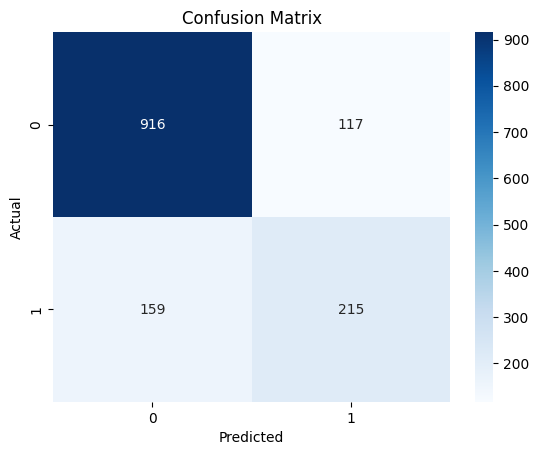

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Step 2: Load Dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Step 3: Quick Look
print(df.head())
print(df["Churn"].value_counts())

# Step 4: Clean & Preprocess
# Drop customerID as it’s not useful
df.drop("customerID", axis=1, inplace=True)

# Convert TotalCharges to numeric (has some spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df.dropna(inplace=True)

# Encode target variable
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Label encode binary columns
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encode other categorical variables
df = pd.get_dummies(df, columns=[col for col in cat_cols if col not in binary_cols])

# Feature scaling
scaler = StandardScaler()
X = df.drop('Churn', axis=1)
y = df['Churn']
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Step 6: Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Predict and Evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
